# 과제_0714

Q1. index를 기준으로 3개 그룹으로 구분하여 a:평균, b:최대값, c:합계를 각각 계산하여 출력하세요.

In [1]:
import pandas as pd
import numpy as np

data = np.arange(1,22).reshape(7,3)
df = pd.DataFrame(data, columns = list('abc'), index = list('1122333'))
df.reset_index(inplace=True)
df

,index,a,b,c
0,1,1,2,3
1,1,4,5,6
2,2,7,8,9
3,2,10,11,12
4,3,13,14,15
5,3,16,17,18
6,3,19,20,21


In [2]:
d_g1 = df.groupby('index')['a'].mean()
d_g2 = df.groupby('index')['b'].max()
d_g3 = df.groupby('index')['c'].sum()

print(d_g1)
print(d_g2)
print(d_g3)

index
1     2.5
2     8.5
3    16.0
Name: a, dtype: float64
index
1     5
2    11
3    20
Name: b, dtype: int64
index
1     9
2    21
3    54
Name: c, dtype: int64


In [3]:
# 다른 방법
grouped = df.groupby('index')
cal = grouped.agg({'a':'mean','b':'max','c':'sum'})
print(cal)

          a   b   c
index              
1       2.5   5   9
2       8.5  11  21
3      16.0  20  54


Q2. deck 열의 NaN 갯수를 계산하세요.

In [4]:
import seaborn as sns
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic_df['deck'].isnull().sum()

688

Q3. titanic_df의 처음 5개 행에서 null 값을 찾아 출력하세요. (True, False로)

In [6]:
titanic_df.head().isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


Q4. titanic_df의 각 칼럼별 null의 갯수를 for 반복문을 사용해서 구한 후 출력하세요.  
(missing_count는 예외 처리하고 처리 방식은 0을 출력함)  
Null값 없으면 0으로!

In [7]:
missing_df = titanic_df.isnull()
for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()
    try:
        print(col,':',missing_count[True])
    except:
        print(col,':',0)

survived : 0
pclass : 0
sex : 0
age : 177
sibsp : 0
parch : 0
fare : 0
embarked : 2
class : 0
who : 0
adult_male : 0
deck : 688
embark_town : 2
alive : 0
alone : 0


Q5. 'mpg'를 'kpl'로 환산하여 새로운 열을 생성하고 처음 3개 행을 소수점 아래 둘째 자리에서 반올림하여 출력하세요.

In [8]:
import pandas as pd
auto_df = pd.read_csv('auto-mpg.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
# mpg = 1 # 갤런 당 마일
# kpl = 0.425144 # 리터 당 킬로미터

kpl환산 = 0.425144

kpl = auto_df['mpg']*kpl환산
auto_df_kpl = pd.concat([auto_df,kpl],axis=1)
auto_df_kpl.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model year', 'origin', 'car name', 'kpl']
auto_df_kpl.iloc[0:3,9] = auto_df_kpl.iloc[0:3,9].round(1)
auto_df_kpl

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,kpl
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,7.700000
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,6.400000
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,7.700000
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,6.802304
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,7.227448
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,11.478888
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,18.706336
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,13.604608
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,11.904032


Q6. titanic_df 데이터 셋을 전처리하고 탐색하여 데이터 셋에 대한 설명 및 분석 과제를 기술하세요 (전처리 최소 5개 이상)

In [10]:
import seaborn as sns
titanic_df1 = sns.load_dataset('titanic')
titanic_df1

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [12]:
titanic_df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


타이타닉 영화에서 여자와 아이들을 배에 먼저 태운게 생각나서,  
성별과 나이에 대한 생존율을 분석해보기로 함.

컬럼정리

1. 비슷한 컬럼끼리 분류

- survived / alive
- sex / adult_male
- age / who
- alone / sibsp / parch
- embarked / embark_town / deck
- pclass / class / fare

2. 내가 정한 분석방향에 맞지 않는 컬럼 제거

- alone / sibsp / parch
- embarked / embark_town / deck
- pclass / class / fare

3. 결측치 있는 컬럼 및 겹치는 컬럼 제거
- (결측치) alive, age
- (겹침) adult_male  
  
남는 컬럼 : survived, sex, who

In [13]:
# df 복사해서 사용
t_df = titanic_df.copy()
t_df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [14]:
# 결측치 있는 컬럼 삭제
t_df = t_df.dropna(axis=1)
t_df

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [15]:
# 불필요한 컬럼 삭제
t_df = t_df.drop(['pclass','sibsp','parch','fare','class','adult_male','alive','alone'],axis=1)
t_df

# 여기선 reindex 사용해서 필요한 컬럼만 가져오는게 더 간편

,survived,sex,who
0,0,male,man
1,1,female,woman
2,1,female,woman
3,1,female,woman
4,0,male,man
...,...,...,...
886,0,male,man
887,1,female,woman
888,0,female,woman
889,1,male,man


In [16]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  891 non-null    int64 
 1   sex       891 non-null    object
 2   who       891 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.0+ KB


### 생존자

In [17]:
print(t_df.survived.value_counts()) # 생존자 수 확인
생존률 = round(342/891*100,2)
생존률

# 전체 탑승객 549명 / 생존자 342명

0    549
1    342
Name: survived, dtype: int64


38.38

In [18]:
t_surv = t_df.query('survived==1') # 생존자만 따로 뺌(전체 891 중 342명)
t_surv

,survived,sex,who
1,1,female,woman
2,1,female,woman
3,1,female,woman
8,1,female,woman
9,1,female,child
...,...,...,...
875,1,female,child
879,1,female,woman
880,1,female,woman
887,1,female,woman


### 남/여

In [19]:
print(t_df.sex.value_counts()) # 전체 탑승객의 성별

print('='*80)

print(t_surv.sex.value_counts()) # 전체 생존자의 성별

male      577
female    314
Name: sex, dtype: int64
female    233
male      109
Name: sex, dtype: int64


In [20]:
print("< 탑승객 남/여 비율 >")
print(t_df.sex.value_counts(1))

print("\n< 생존자 남/여 비율 >")
print(t_surv.sex.value_counts(1))

< 탑승객 남/여 비율 >
male      0.647587
female    0.352413
Name: sex, dtype: float64

< 생존자 남/여 비율 >
female    0.681287
male      0.318713
Name: sex, dtype: float64


In [21]:
# 여자 생존률
t_surv_f = round(233/314*100,2)
print(f"여자 생존률 : {t_surv_f}")

# 남자 생존률
t_surv_m = round(109/577*100,2) 
print(f"남자 생존률 : {t_surv_m}")

print('='*80)

# 생존자 중 여자 비율
surv_f = round(233/342*100,2)
print(f"생존자 중 여자 비율 : {surv_f}")

# 생존자 중 남자 비율
surv_m = round(109/342*100,2)
print(f"생존자 중 남자 비율 : {surv_m}")

여자 생존률 : 74.2
남자 생존률 : 18.89
생존자 중 여자 비율 : 68.13
생존자 중 남자 비율 : 31.87


### 남 / 여 / 아이  
(조금 더 구체적으로)

In [22]:
### sex로 구분
print(t_df.sex.value_counts())  # 전체 남/여

print('='*80)

print(t_surv.sex.value_counts())  # 생존자 남/여

s_m = 577
s_f = 314
s_surv_m = 109
s_surv_f = 233

male      577
female    314
Name: sex, dtype: int64
female    233
male      109
Name: sex, dtype: int64


In [23]:
### who로 구분
print(t_df.who.value_counts()) # 전체 구분

print('='*80)

print(t_surv.who.value_counts())

w_m = 537
w_f = 271
w_c = 83
w_surv_m = 88
w_surv_f = 205
w_surv_c = 49

man      537
woman    271
child     83
Name: who, dtype: int64
woman    205
man       88
child     49
Name: who, dtype: int64


In [24]:
m_child = s_m - w_m # 남자 아이 수
m_child

40

In [25]:
f_child = s_f - w_f # 여자 아이 수
f_child

43

In [26]:
m_surv_child = s_surv_m - w_surv_m # 남자 아이 생존자 수
m_surv_child

21

In [27]:
f_surv_child = s_surv_f - w_surv_f # 여자 아이 생존자 수
f_surv_child

28

In [28]:
성인여자생존률 = round(w_surv_f/w_f*100,2)
print(f"성인 여자 생존률 : {성인여자생존률}")

성인남자생존률 = round(w_surv_m/w_m*100,2)
print(f"성인 남자 생존률 : {성인남자생존률}")

아이생존률 = round(w_surv_c/w_c*100,2)
print(f"아이 생존률 : {아이생존률}")

print('='*80)

여자아이생존률 = round(f_surv_child/f_child*100,2)
print(f"여자 아이 생존률 : {여자아이생존률}")
      
남자아이생존률 = round(m_surv_child/m_child*100,2)
print(f"남자 아이 생존률 : {남자아이생존률}")

성인 여자 생존률 : 75.65
성인 남자 생존률 : 16.39
아이 생존률 : 59.04
여자 아이 생존률 : 65.12
남자 아이 생존률 : 52.5


In [29]:
# 생존자 중 성인여자 비율
surv_f = round(w_surv_f/342*100,2)
print(f"생존자 중 성인여자 비율 : {surv_f}")

# 생존자 중 성인남자 비율
surv_m = round(w_surv_m/342*100,2)
print(f"생존자 중 성인남자 비율 : {surv_m}")

# 생존자 중 child 비율
surv_m = round(w_surv_c/342*100,2)
print(f"생존자 중 아이 비율 : {surv_m}")

생존자 중 성인여자 비율 : 59.94
생존자 중 성인남자 비율 : 25.73
생존자 중 아이 비율 : 14.33


In [30]:
import pandas as pd

td_surv = pd.DataFrame({'탑승자':[537,271,40,43], '생존자':[88,205,21,28], '생존률(%)':[75.65,16.39,65.12,52.50]},\
                       index = ['남자_성인','여자_성인','남자_아이','여자_아이'])
td_surv

,탑승자,생존자,생존률(%)
남자_성인,537,88,75.65
여자_성인,271,205,16.39
남자_아이,40,21,65.12
여자_아이,43,28,52.50


In [31]:
td_surv1 = pd.DataFrame({'p':[537,271,83], 's':[88,205,49], 's(%)':[16.39,75.65,59.04]},\
                       index = ['man','woman','child'])
td_surv1

,p,s,s(%)
man,537,88,16.39
woman,271,205,75.65
child,83,49,59.04


In [32]:
td_surv2 = td_surv1.transpose()
td_surv2

,man,woman,child
p,537.00,271.00,83.00
s,88.00,205.00,49.00
s(%),16.39,75.65,59.04


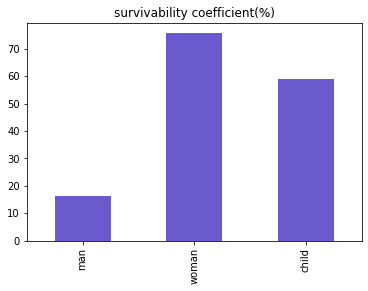

In [33]:
ax2= td_surv2.iloc[2].plot(kind='bar', title="survivability coefficient(%)", color='slateblue')

### class

In [34]:
t_df1 = titanic_df.reindex(columns=['survived','pclass','fare'])
t_df1

,survived,pclass,fare
0,0,3,7.2500
1,1,1,71.2833
2,1,3,7.9250
3,1,1,53.1000
4,0,3,8.0500
...,...,...,...
886,0,2,13.0000
887,1,1,30.0000
888,0,3,23.4500
889,1,1,30.0000


In [35]:
t_df1_1 = t_df1.groupby('pclass').mean()
t_df1_1

,survived,fare
pclass,,
1,0.629630,84.154687
2,0.472826,20.662183
3,0.242363,13.675550


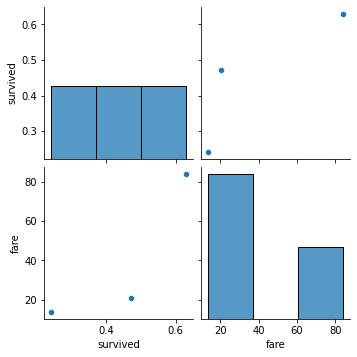

In [36]:
sns.pairplot(t_df1_1)

In [37]:
t_df1.pclass.value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [38]:
first_s = t_df1.query("pclass==1 & survived==1")
print(first_s.count())

first_ss = round(136/216*100,2) # 1등급 생존률
print(f"1등급 생존률 : {first_ss}%")

first_s

survived    136
pclass      136
fare        136
dtype: int64
1등급 생존률 : 62.96%


,survived,pclass,fare
1,1,1,71.2833
3,1,1,53.1000
11,1,1,26.5500
23,1,1,35.5000
31,1,1,146.5208
...,...,...,...
862,1,1,25.9292
871,1,1,52.5542
879,1,1,83.1583
887,1,1,30.0000


In [39]:
second_s = t_df1.query("pclass==2 & survived==1")
print(second_s.count())

second_ss = round(87/184*100,2)
print(f"2등급 생존률 : {second_ss}%")

second_s

survived    87
pclass      87
fare        87
dtype: int64
2등급 생존률 : 47.28%


,survived,pclass,fare
9,1,2,30.0708
15,1,2,16.0000
17,1,2,13.0000
21,1,2,13.0000
43,1,2,41.5792
...,...,...,...
831,1,2,18.7500
865,1,2,13.0000
866,1,2,13.8583
874,1,2,24.0000


In [40]:
third_s = t_df1.query("pclass==3 & survived==1")
print(third_s.count())

third_ss = round(119/491*100,2)
print(f"3등급 생존률 : {third_ss}%")

survived    119
pclass      119
fare        119
dtype: int64
3등급 생존률 : 24.24%


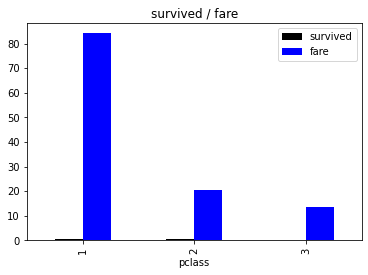

In [41]:
ax = t_df1_1.plot(kind='bar', title="survived / fare", color=['black','blue'])

In [42]:
t_df1_1['fare'] = t_df1_1['fare']/100
t_df1_1

,survived,fare
pclass,,
1,0.629630,0.841547
2,0.472826,0.206622
3,0.242363,0.136756


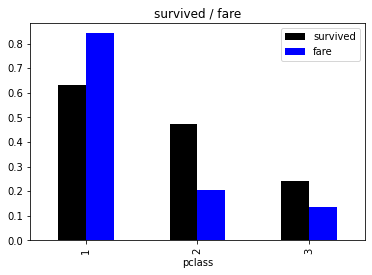

In [43]:
ax = t_df1_1.plot(kind='bar', title="survived / fare", color=['black','blue'])

pclass 가 높을 수록 fare와 생존률이 높은걸 확인할 수 있음.

### 분석 결과



<여/남>

여자 생존률 : 74.2%  
남자 생존률 : 18.89%  
  
---------------------------------------- 
  
<여/남/아이>

성인 여자 생존률 : 75.65%  
성인 남자 생존률 : 16.39%  
아이 생존률 : 59.04%  
    
---------------------------------------- 

\<pclass>
    
1등급 생존률 : 62.96%  
2등급 생존률 : 47.28%  
3등급 생존률 : 24.24%  

---------------------------------------- 

<생존자 중 여/남>

생존자 중 여자 비율 : 68.13%  
생존자 중 남자 비율 : 31.87%  
  
---------------------------------------- 

<생존자 중 여/남/아이>

생존자 중 성인여자 비율 : 59.94%  
생존자 중 성인남자 비율 : 25.73%  
생존자 중 아이 비율 : 14.33%  
  
---------------------------------------- 


- 성별 : 성별로만 비교하였을 때 남자에 비해 여자의 생존율이 확연히 높음.  
  
- 성별 및 성인/아이 : 아이는 성별에 따른 큰 차이는 없었으며,  
생존율이 성인여자 > 아이(남자아이>여자아이) > 성인남자 순으로 높음.  
  
- pclass, fare : pclass, fare, 생존율은 모두 비례관계에 있음.